# Data Thining - Simulation

In [2]:
# libarary
import numpy as np
import matplotlib.pyplot as plt

### Setup - Data Generation

In [3]:
n = 100
d = 10
sigma = 1
mu = 0 # mu_i of Y_i
gamma = 1

In [4]:
X = np.random.normal(0, 1, (n, d))
print(X.shape)        # should be (100, 10)
print(np.mean(X))     # close to 0
print(np.var(X))

(100, 10)
0.01046219610714565
0.9817781680865936


In [5]:
i = np.arange(1, d+1)
print(i)
beta_star = 2.0 ** (-i + 1)
print(beta_star)

[ 1  2  3  4  5  6  7  8  9 10]
[1.         0.5        0.25       0.125      0.0625     0.03125
 0.015625   0.0078125  0.00390625 0.00195312]


In [6]:
epsilon = np.random.normal(0,1,size=n)

In [7]:
Y = X@beta_star + epsilon

In [8]:
w_vec = np.random.normal(loc=0,scale=gamma*sigma, size=n)

In [9]:
# w_vec = np.random.normal(loc=0,scale=sigma, size=n)
# y_vec = np.random.normal(loc=mu,scale=sigma, size=n)
# y_1_vec = y_vec + gamma * w_vec
# y_2_vec = y_vec - (1/gamma) * w_vec

In [10]:
def MSE(y_test, y_predict):
    return np.mean((y_test - y_predict) ** 2)

In [11]:
def norm_sample(size, d):
    X = np.random.normal(0, 1, (size, d))
    epsilon = np.random.normal(0,1,size=size)
    Y = X@beta_star + epsilon
    return X, Y

In [12]:
N = 1000
bias_vec = np.zeros(N)
np.random.seed(123)
for i in range(N):
    X = np.random.normal(0, 1, (n, d))
    epsilon = np.random.normal(0,1,size=n)

    Y = X@beta_star + epsilon

    w_vec = np.random.normal(loc=0,scale=sigma, size=n)

    y_1_vec = Y + gamma * w_vec
    y_2_vec = Y - (1/gamma) * w_vec

    beta_hat = np.linalg.inv(X.T@X)@X.T@y_1_vec

    y_predict = X@beta_hat

    emprical_risk = MSE(y_2_vec, y_predict)

    x_newDraw, y_newDraw = norm_sample(n, d)
    y_newDraw_predict = x_newDraw@beta_hat
    true_risk = MSE(y_newDraw, y_newDraw_predict)

    bias = emprical_risk - true_risk
    bias_vec[i] = bias


In [13]:
print(bias_vec)

[ 1.33743361  1.17301269  1.15186173  1.41357274  1.18699453  0.99546308
  0.35361779  1.0996238   0.96249171  1.30909866  0.71128538  2.26617396
  1.38034085  1.0877417   0.86925352  0.55669568  1.54345017  1.14012954
  1.35576932  0.63188429  1.05360641  0.80765715  1.36169646  0.98066808
  1.08939538  0.77511403  0.30569144  0.57669762  0.42269238  1.12320664
  0.60653686  0.21798576  0.17505882  1.12799539  1.13072632  1.06043097
  1.19712341  1.16042863  1.7094007   1.38533187  0.75373065  0.61738432
  0.8234423   0.49639918  1.27368893  0.54568539  1.27153589  1.31271551
  0.67768301  0.61659527  1.72040636  1.19696851  1.22791365  0.97266306
  0.9603216   1.29102848  0.87672616  1.06709301  0.72892409  1.45906023
  1.23289802  0.86272679  1.20727614  0.72144631  1.24599887  1.26607957
  1.13956884  0.50564736  1.71973002  0.64962867  0.59341121  0.87736003
  1.02376063  1.0309164   0.47091042  1.18730473  0.48963464  0.96659318
  0.75530145  0.98525088  1.25037118  1.58653693  1

In [14]:
def linear_simulation(gamma_list, beta_star, N, seed = 123):
    average_bias_list = []
    np.random.seed(seed)

    for gamma in gamma_list:
        # simulation: 
        bias_vec = np.zeros(N)
        
        for i in range(N):
            X = np.random.normal(0, 1, (n, d))
            epsilon = np.random.normal(0,1,size=n)

            Y = X@beta_star + epsilon

            w_vec = np.random.normal(loc=0,scale=sigma, size=n)

            y_1_vec = Y + gamma * w_vec
            y_2_vec = Y - (1/gamma) * w_vec

            beta_hat = np.linalg.inv(X.T@X)@X.T@y_1_vec

            y_predict = X@beta_hat

            emprical_risk = MSE(y_2_vec, y_predict)

            x_newDraw, y_newDraw = norm_sample(n, d)
            y_newDraw_predict = x_newDraw@beta_hat
            true_risk = MSE(y_newDraw, y_newDraw_predict)

            bias = emprical_risk - true_risk
            bias_vec[i] = bias

        average_bias_list.append(np.mean(bias_vec))

    gamma_squared = np.array(gamma_list) ** 2
    plt.plot(gamma_squared, average_bias_list)
    plt.xlabel("gamma^2")
    plt.ylabel("Bias")
    plt.title("Bias Change in terms of gamma")
    plt.show()

    return average_bias_list

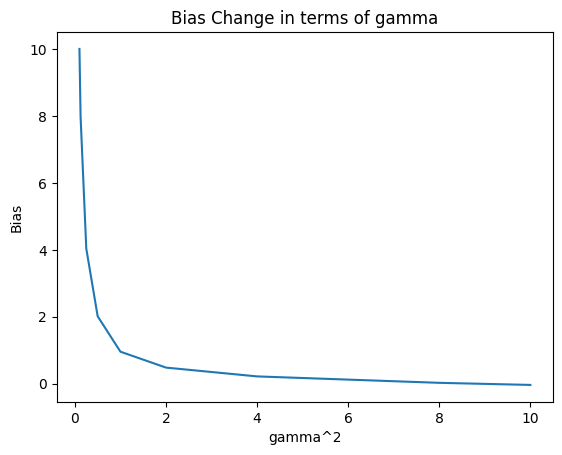

[np.float64(10.01564729740554),
 np.float64(7.98429847495459),
 np.float64(4.040183444087049),
 np.float64(2.0135923195143133),
 np.float64(0.9536315054649271),
 np.float64(0.47770219278838383),
 np.float64(0.21409889447190192),
 np.float64(0.02185526334086673),
 np.float64(-0.04085871139614976)]

In [18]:
gamma_list = np.sqrt([1/10, 1/8, 1/4, 1/2, 1, 2, 4, 8, 10])
gamma_list
average_bias_l = linear_simulation(gamma_list, beta_star, N, seed = 123)
average_bias_l
